<a href="https://www.kaggle.com/code/nxfrsta/data-preprocessing-and-eda?scriptVersionId=154187851" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ast
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualizations
# Input data files are available in the read-only "../input/" directory

<details><summary>Description of the dataset</summary>

- projectId: Unique identifier for each job posting
- job_title: Title of the job posting
- job_description: Description of the job requirements and responsibilities
- tags: Relevant keywords associated with the job posting
- client_state: Location of the client posting the job
- client_country: Country of the client posting the job
- client_average_rating: Average rating of the client from previous freelance projects
- client_review_count: Number of reviews the client has received from previous freelance projects
- min_price: Minimum price range for the job
- max_price: Maximum price range for the job
- avg_price: Average price range for the job
- currency: Currency in which the job is priced
- rate_type: Type of payment (hourly, fixed price, etc.)

Credits of the dataset goes to <i>Isaac Oresanya</i>

Notebook author: <a href= https://www.linkedin.com/in/emanuelbe3/>Emanuel Benitez</a>
</details>



In [2]:
freelancer_df = pd.read_csv('/kaggle/input/freelancer/freelancer_job_postings.csv')
freelancer_df.head()

,projectId,job_title,job_description,tags,client_state,client_country,client_average_rating,client_review_count,min_price,max_price,avg_price,currency,rate_type
0,37426471,development and implementation of a federated ...,please bid only if you are ready to do the wor...,"['algorithm', 'java', 'python', 'machine learn...",Heilbronn,Germany,5.0,17,8.0,30.0,19.0,EUR,fixed
1,37421546,Data Entry -- 2,Project Title: Data Entry - Data Analysis in E...,"['excel', 'statistical analysis', 'statistics'...",Nagpur,India,0.0,0,750.0,1250.0,1000.0,INR,hourly
2,37400492,Data Scrap,I am looking for a freelancer who can help me ...,"['web scraping', 'data mining', 'data entry', ...",Eaubonne,France,5.0,1,30.0,250.0,140.0,EUR,fixed
3,37404568,Big Data Project,Store Sales Data Analysis: A Data Engineering ...,"['big data sales', 'data science', 'data minin...",Mundra,India,5.0,2,5000.0,5500.0,5250.0,INR,fixed
4,37397423,Virtual Assistant / Research Assistant,Job Description: I am seeking a Virtual Assist...,"['data entry', 'virtual assistant', 'web searc...",NaN,United States,0.0,0,5.0,15.0,10.0,USD,hourly


Some considerations:
- I removed the "projectId" column. This was a useful column to check for duplicates, (here can't exist more than one job with the same projectId). After checking this, I dropped the column.

- I removed the "client_state" column. This doesn't align with the goals of my analysis (find the most frequent jobs for freelancers, globally). 

- It would be useful to <b>change the currencies and price to USD</b>. This is because there are some countries with a variability on inflation that makes the data obsolete after a period of time. So, my goal is to change the currencies: ['EUR', 'INR', 'USD', 'SGD', 'GBP', 'AUD', 'HKD', 'CAD', 'NZD'] to [USD] and convert each price (min_price, max_price, avg_price) to USD. This is to make a more efficent and clean analysis of prices.

- It's possible to get some additional information from the columns "job_title" and "job_description" using RegEx or similar tools for analysis. But I found this approach difficult (the text in the job descriptions might not have easily identifiable patterns), so I focused on the "tags" column. This column has a list of tags for each job post. This can be useful as they are key-words of the task.

## 1. <b>Duplicates, removing 'projectId' and 'client_state'</b>

In [3]:
print('Number of duplicates by projectId:', freelancer_df.duplicated(subset='projectId').sum())
freelancer_df.drop(['projectId', 'client_state'], axis=1, inplace=True)

Number of duplicates by projectId: 0


## 2. <b> Convert currencies to USD</b>
 
 To do this, I need to change the values on min_price, max_price, avg_price, and drop the "currency" column. I also need to rename the columns to be more explainables: min_price(USD), max_price(USD), and avg_price(USD). The dataset was uploaded on <b>22 november</b>. So the conversion rates to USD are:
 
 - 'EUR': 1.09,
 - 'INR': 0.012,
 - 'USD': 1,
 - 'SGD': 0.75,
 - 'GBP': 1.25,
 - 'AUD': 0.65,
 - 'HKD': 0.13,
 - 'CAD': 0.73,
 - 'NZD': 0.60
 
 
 <b>a</b>. First I will define a dictionary with the conversion_rates of each of this currencies. 

In [4]:
print('Currencies on the dataset:', freelancer_df['currency'].unique())

conversion_rates = {'EUR': 1.09, 'INR': 0.012, 'USD': 1, 'SGD': 0.75,
                    'GBP': 1.25, 'AUD': 0.65, 'HKD': 0.13, 'CAD': 0.73,
                    'NZD': 0.60}

Currencies on the dataset: ['EUR' 'INR' 'USD' 'SGD' 'GBP' 'AUD' 'HKD' 'CAD' 'NZD']


<b>b</b>. Now I use the method .apply() to apply a function along the axis of each column (min_price, max_price, and avg_price). The anonymous lambda function will evaluate what is the currency on the "<i>currency</i>" column. Then goes to the dictionary of conversion_rates and takes his respective rate, and then multiplies it for min_price declared on that entry/row. 

> At this step, I created three news columns that clarify that it uses as currency value (USD). After this, it's necessary to drop the (now) unnecesary columns "min_price", "max_price", and "avg_price".

In [5]:
# Applying currency conversion...

# for min_price:
freelancer_df['min_price(USD)'] = freelancer_df.apply(lambda row: row['min_price'] * conversion_rates[row['currency']], axis=1)
# for max_price:
freelancer_df['max_price(USD)'] = freelancer_df.apply(lambda row: row['max_price'] * conversion_rates[row['currency']], axis=1)
# for avg_price:
freelancer_df['avg_price(USD)'] = freelancer_df.apply(lambda row: row['avg_price'] * conversion_rates[row['currency']], axis=1)

freelancer_df.head(5)

,job_title,job_description,tags,client_country,client_average_rating,client_review_count,min_price,max_price,avg_price,currency,rate_type,min_price(USD),max_price(USD),avg_price(USD)
0,development and implementation of a federated ...,please bid only if you are ready to do the wor...,"['algorithm', 'java', 'python', 'machine learn...",Germany,5.0,17,8.0,30.0,19.0,EUR,fixed,8.72,32.7,20.71
1,Data Entry -- 2,Project Title: Data Entry - Data Analysis in E...,"['excel', 'statistical analysis', 'statistics'...",India,0.0,0,750.0,1250.0,1000.0,INR,hourly,9.00,15.0,12.00
2,Data Scrap,I am looking for a freelancer who can help me ...,"['web scraping', 'data mining', 'data entry', ...",France,5.0,1,30.0,250.0,140.0,EUR,fixed,32.70,272.5,152.60
3,Big Data Project,Store Sales Data Analysis: A Data Engineering ...,"['big data sales', 'data science', 'data minin...",India,5.0,2,5000.0,5500.0,5250.0,INR,fixed,60.00,66.0,63.00
4,Virtual Assistant / Research Assistant,Job Description: I am seeking a Virtual Assist...,"['data entry', 'virtual assistant', 'web searc...",United States,0.0,0,5.0,15.0,10.0,USD,hourly,5.00,15.0,10.00


<b>c</b>. Now I have to remove the columns "min_price", "max_price", "avg_price", and "currency". 

In [6]:
freelancer_df.drop(columns = ["min_price", "max_price", "avg_price", "currency"], inplace = True)
freelancer_df.head(5)

,job_title,job_description,tags,client_country,client_average_rating,client_review_count,rate_type,min_price(USD),max_price(USD),avg_price(USD)
0,development and implementation of a federated ...,please bid only if you are ready to do the wor...,"['algorithm', 'java', 'python', 'machine learn...",Germany,5.0,17,fixed,8.72,32.7,20.71
1,Data Entry -- 2,Project Title: Data Entry - Data Analysis in E...,"['excel', 'statistical analysis', 'statistics'...",India,0.0,0,hourly,9.00,15.0,12.00
2,Data Scrap,I am looking for a freelancer who can help me ...,"['web scraping', 'data mining', 'data entry', ...",France,5.0,1,fixed,32.70,272.5,152.60
3,Big Data Project,Store Sales Data Analysis: A Data Engineering ...,"['big data sales', 'data science', 'data minin...",India,5.0,2,fixed,60.00,66.0,63.00
4,Virtual Assistant / Research Assistant,Job Description: I am seeking a Virtual Assist...,"['data entry', 'virtual assistant', 'web searc...",United States,0.0,0,hourly,5.00,15.0,10.00


## 3. <b>Checking for nulls</b>

There's only one NaN value on the column "client_country". I filled it with a "Unavailable" value. It is possible that there are more entries that are unknown or inconsistent on this column, but this isn't the focus of my analysis, so I will keep those inconsistences as they don't affect the results.

In [7]:
print(freelancer_df.isnull().sum())

# Filling NaN values (1)
freelancer_df['client_country'].fillna('Unavailable', inplace=True)

job_title                0
job_description          0
tags                     0
client_country           1
client_average_rating    0
client_review_count      0
rate_type                0
min_price(USD)           0
max_price(USD)           0
avg_price(USD)           0
dtype: int64


In [8]:
print('20 most mentioned countries:\n')
freelancer_df['client_country'].value_counts().head(20)

20 most mentioned countries:



client_country
India                   2743
United States           1560
United Kingdom           622
Australia                509
Saudi Arabia             333
Canada                   291
United Arab Emirates     198
Pakistan                 195
Malaysia                 162
Germany                  145
Egypt                    112
Spain                    100
Nigeria                   90
Singapore                 88
France                    85
Italy                     82
Bangladesh                74
South Africa              70
Israel                    69
Turkey                    66
Name: count, dtype: int64

## 4. <b>Atypical values on min_price, max_price, and avg_price</b>

 We can see at first that there are atypical values on each of those columns. There are numbers that are too big to be considered valid entries. And even if those were valid values, they don't represent the most common scenarios and job postings:
- min_price: 145000
- max_price: 170000
- avg_price: 157500

In [9]:
freelancer_df.describe()

,client_average_rating,client_review_count,min_price(USD),max_price(USD),avg_price(USD)
count,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000
mean,2.407593,20.823126,177.835916,432.138544,304.987230
std,2.472512,87.454084,1731.909014,2605.974047,2137.511075
min,0.000000,0.000000,1.200000,1.212000,1.206000
25%,0.000000,0.000000,9.000000,25.000000,19.500000
50%,0.000000,0.000000,18.000000,150.000000,84.000000
75%,5.000000,5.000000,30.000000,250.000000,144.000000
max,5.000000,969.000000,145000.000000,170000.000000,157500.000000


In this step:

- I will consider values that exceed 1.5 times the Interquartile Range (IQR) above the third quartile (75%), or that are below 1.5 times the IQR below the first quartile (25%).

&nbsp;I will perform this operation on the "min_price(USD)" column, as I believe it is more valid for some users on the platform to publish an extremely high maximum price, but it is much less likely for a minimum price to be set so high. This would impact the benefits of the user who posted the job offer

In [10]:
q1 = freelancer_df['min_price(USD)'].quantile(0.25)
q3 = freelancer_df['min_price(USD)'].quantile(0.75)
iqr_min_price = q3 - q1

lower_bound = q1 - 1.5 * iqr_min_price
upper_bound = q3 + 1.5 * iqr_min_price

print(f'First quartile: {q1}')
print(f'Third quartile: {q3}')
print(f'IQR: {iqr_min_price}')
print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

First quartile: 9.0
Third quartile: 30.0
IQR: 21.0
Lower bound: -22.5
Upper bound: 61.5


So, with this calculation, I obtain that the lower and upper limits in the "min_price(USD)" column will be:

- -22.5 USD (this is an impossible minimum price) for the lower threshold
- 61.5 USD for the upper threshold

Now, I count the occurrences of these values:

In [11]:
freelancer_df[freelancer_df['min_price(USD)'] > 61.5].shape

(1879, 10)

This probably <b>suggests something else</b> that I didn't take into account. This amount of atypical values is too large (approximately 20% of the data) to be considered simply as outliers. So, this could be another type of class that had gone unnoticed:

In [12]:
freelancer_df[freelancer_df['min_price(USD)'] > 61.5].rate_type.value_counts()

rate_type
fixed     1871
hourly       8
Name: count, dtype: int64

 This means that these values <b>are not outliers</b>. They are (probably valid) values that have a different payment type: fixed_hours. These values do not impact my main focus, which is to analyze the demand for data analysis and processing tasks, so I can ignore them.

## 5. Feature engineering: extracting each tag

 The goal of my analysis is to get an understanding of what could be the answer to the question: <i>What type of service is most in demand in the data sector for Freelancers</i>? As mentioned previously, I found it challenging to focus on the description column, so I have opted for a relatively simpler method: <b>taking each tag mentioned in the "tags" column</b>. These tags are relevant keywords associated with the posted job. They are typically used to help the search engine match the job more closely with search terms.<br>

 Based on this, I can count the frequency and observe the total percentage it represents in the sample (9193). The first step to achieve this is to separate each tag into different columns: "tag_1", "tag_2", "tag_3", etc.


In [13]:
freelancer_df[['job_title', 'tags', 'avg_price(USD)']]

,job_title,tags,avg_price(USD)
0,development and implementation of a federated ...,"['algorithm', 'java', 'python', 'machine learn...",20.71
1,Data Entry -- 2,"['excel', 'statistical analysis', 'statistics'...",12.00
2,Data Scrap,"['web scraping', 'data mining', 'data entry', ...",152.60
3,Big Data Project,"['big data sales', 'data science', 'data minin...",63.00
4,Virtual Assistant / Research Assistant,"['data entry', 'virtual assistant', 'web searc...",10.00
...,...,...,...
9188,Computer Vision / Feature Extraction from Aeri...,"['python', 'deep learning', 'computer vision',...",140.00
9189,Database and software analysis,['data processing'],500.00
9190,Business Analyst (Strategic Projects) -- 2,"['python', 'business analysis', 'financial ana...",13.00
9191,AI developer needed,"['data analysis', 'machine learning (ml)', 'py...",4360.00


<b>a</b>. Tags are in a list format, but they are considered as a string column by Pandas, so I first need to convert the values to the list type. For this, I use the ast library.

> First, I convert the strings in the 'tags' column to lists:

In [14]:
freelancer_df['tags'] = freelancer_df['tags'].apply(ast.literal_eval)

print("· Number of tags and count:\n", freelancer_df['tags'].apply(len).value_counts())
print("\n· Number of entries with more than five tags:", len(freelancer_df[freelancer_df['tags'].apply(len) > 5]['tags']))

· Number of tags and count:
 tags
5     6144
4     1252
3      872
2      682
1      114
6       33
7       25
8       16
9        8
13       7
11       7
10       6
12       5
14       4
15       4
19       3
21       3
27       2
17       2
25       1
16       1
22       1
46       1
Name: count, dtype: int64

· Number of entries with more than five tags: 129


<b>b</b>. At this point, a problem arises in this approach. There are job postings that contain more than 5 tags. The percentage of job postings containing more than five tags (129) is approximately 1.4% of the total sample (9193). For this reason, and to avoid affecting the results of my analysis, I will proceed to <b>remove</b> them to create five columns with each tag. For entries containing fewer than five tags, I will fill the missing tag with a NaN value.

> These entries, in addition to representing approximately only 1.4% of the data, were also considered not to represent high-quality or significant job postings for the results.


So I filtered the data to contain the job postings with less or equal to five tags:

In [15]:
filtered_df = freelancer_df[freelancer_df['tags'].apply(len) <= 5]
# I need to reset the index in order to do an inner join (with concat) with the tags df
filtered_df = filtered_df.reset_index(drop=True) 
filtered_df

,job_title,job_description,tags,client_country,client_average_rating,client_review_count,rate_type,min_price(USD),max_price(USD),avg_price(USD)
0,development and implementation of a federated ...,please bid only if you are ready to do the wor...,"[algorithm, java, python, machine learning (ml...",Germany,5.0,17,fixed,8.72,32.7,20.71
1,Data Entry -- 2,Project Title: Data Entry - Data Analysis in E...,"[excel, statistical analysis, statistics, spss...",India,0.0,0,hourly,9.00,15.0,12.00
2,Data Scrap,I am looking for a freelancer who can help me ...,"[web scraping, data mining, data entry, excel,...",France,5.0,1,fixed,32.70,272.5,152.60
3,Big Data Project,Store Sales Data Analysis: A Data Engineering ...,"[big data sales, data science, data mining, st...",India,5.0,2,fixed,60.00,66.0,63.00
4,Virtual Assistant / Research Assistant,Job Description: I am seeking a Virtual Assist...,"[data entry, virtual assistant, web search, ex...",United States,0.0,0,hourly,5.00,15.0,10.00
...,...,...,...,...,...,...,...,...,...,...
9059,statistical analyser,I ran an online study and I am trying to analy...,"[statistics, statistical analysis, r programmi...",Kuwait,0.0,0,fixed,30.00,250.0,140.00
9060,Computer Vision / Feature Extraction from Aeri...,Looking for an experienced computer vision / f...,"[python, deep learning, computer vision, image...",Argentina,5.0,12,fixed,30.00,250.0,140.00
9061,Database and software analysis,I need a freelancer who's proficient in micros...,[data processing],United Kingdom,0.0,0,fixed,250.00,750.0,500.00
9062,AI developer needed,We are an italian startup seeking for a machin...,"[data analysis, machine learning (ml), python]",Italy,0.0,0,fixed,3270.00,5450.0,4360.00


<b>c</b>. Now I have to extract each tag from the tags column:

In [16]:
# Column names for the tags (five):
column_names = [f'tag_{i+1}' for i in range(5)]

# Extract the data of the tags as a list, to create a new dataframe that I will concatenate with filtered_df
list_of_tags = filtered_df['tags'].to_list()

# Creating the DataFrame. There's no need to reset index, as this is a new DF:
filtered_df_tags = pd.DataFrame(list_of_tags, columns=column_names)
filtered_df_tags.tail()

,tag_1,tag_2,tag_3,tag_4,tag_5
9059,statistics,statistical analysis,r programming language,mathematics,None
9060,python,deep learning,computer vision,image processing,machine learning (ml)
9061,data processing,None,None,None,None
9062,data analysis,machine learning (ml),python,None,None
9063,google cloud platform,data warehousing,etl,python,pyspark


<b>d</b>. Before making the concatenation, I need to convert the tags from dtype NoneType to a NaN:

In [17]:
filtered_df_tags = filtered_df_tags.applymap(lambda x: np.nan if x is None else x)
filtered_df_tags

,tag_1,tag_2,tag_3,tag_4,tag_5
0,algorithm,java,python,machine learning (ml),flutter
1,excel,statistical analysis,statistics,spss statistics,data processing
2,web scraping,data mining,data entry,excel,web search
3,big data sales,data science,data mining,statistical analysis,analytics
4,data entry,virtual assistant,web search,excel,presentations
...,...,...,...,...,...
9059,statistics,statistical analysis,r programming language,mathematics,NaN
9060,python,deep learning,computer vision,image processing,machine learning (ml)
9061,data processing,NaN,NaN,NaN,NaN
9062,data analysis,machine learning (ml),python,NaN,NaN


<b>e</b>. Finally, I can use concat to join both tables:

In [18]:
final_df = pd.concat([filtered_df, filtered_df_tags], axis=1, join='inner')
final_df

,job_title,job_description,tags,client_country,client_average_rating,client_review_count,rate_type,min_price(USD),max_price(USD),avg_price(USD),tag_1,tag_2,tag_3,tag_4,tag_5
0,development and implementation of a federated ...,please bid only if you are ready to do the wor...,"[algorithm, java, python, machine learning (ml...",Germany,5.0,17,fixed,8.72,32.7,20.71,algorithm,java,python,machine learning (ml),flutter
1,Data Entry -- 2,Project Title: Data Entry - Data Analysis in E...,"[excel, statistical analysis, statistics, spss...",India,0.0,0,hourly,9.00,15.0,12.00,excel,statistical analysis,statistics,spss statistics,data processing
2,Data Scrap,I am looking for a freelancer who can help me ...,"[web scraping, data mining, data entry, excel,...",France,5.0,1,fixed,32.70,272.5,152.60,web scraping,data mining,data entry,excel,web search
3,Big Data Project,Store Sales Data Analysis: A Data Engineering ...,"[big data sales, data science, data mining, st...",India,5.0,2,fixed,60.00,66.0,63.00,big data sales,data science,data mining,statistical analysis,analytics
4,Virtual Assistant / Research Assistant,Job Description: I am seeking a Virtual Assist...,"[data entry, virtual assistant, web search, ex...",United States,0.0,0,hourly,5.00,15.0,10.00,data entry,virtual assistant,web search,excel,presentations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059,statistical analyser,I ran an online study and I am trying to analy...,"[statistics, statistical analysis, r programmi...",Kuwait,0.0,0,fixed,30.00,250.0,140.00,statistics,statistical analysis,r programming language,mathematics,NaN
9060,Computer Vision / Feature Extraction from Aeri...,Looking for an experienced computer vision / f...,"[python, deep learning, computer vision, image...",Argentina,5.0,12,fixed,30.00,250.0,140.00,python,deep learning,computer vision,image processing,machine learning (ml)
9061,Database and software analysis,I need a freelancer who's proficient in micros...,[data processing],United Kingdom,0.0,0,fixed,250.00,750.0,500.00,data processing,NaN,NaN,NaN,NaN
9062,AI developer needed,We are an italian startup seeking for a machin...,"[data analysis, machine learning (ml), python]",Italy,0.0,0,fixed,3270.00,5450.0,4360.00,data analysis,machine learning (ml),python,NaN,NaN


In [19]:
final_df.head()

,job_title,job_description,tags,client_country,client_average_rating,client_review_count,rate_type,min_price(USD),max_price(USD),avg_price(USD),tag_1,tag_2,tag_3,tag_4,tag_5
0,development and implementation of a federated ...,please bid only if you are ready to do the wor...,"[algorithm, java, python, machine learning (ml...",Germany,5.0,17,fixed,8.72,32.7,20.71,algorithm,java,python,machine learning (ml),flutter
1,Data Entry -- 2,Project Title: Data Entry - Data Analysis in E...,"[excel, statistical analysis, statistics, spss...",India,0.0,0,hourly,9.00,15.0,12.00,excel,statistical analysis,statistics,spss statistics,data processing
2,Data Scrap,I am looking for a freelancer who can help me ...,"[web scraping, data mining, data entry, excel,...",France,5.0,1,fixed,32.70,272.5,152.60,web scraping,data mining,data entry,excel,web search
3,Big Data Project,Store Sales Data Analysis: A Data Engineering ...,"[big data sales, data science, data mining, st...",India,5.0,2,fixed,60.00,66.0,63.00,big data sales,data science,data mining,statistical analysis,analytics
4,Virtual Assistant / Research Assistant,Job Description: I am seeking a Virtual Assist...,"[data entry, virtual assistant, web search, ex...",United States,0.0,0,hourly,5.00,15.0,10.00,data entry,virtual assistant,web search,excel,presentations


## 6. Tag Frequency Count
 
 For this step it's possible use final_df. But I have already filtered those tags, so for this step isn't necessary to do again the selection of tag_n columns on <i>final_df</i>. I can just simply use filtered_df_tags to count the most frequent tags. 
 >final_df can be useful to make a comparision of prices exploration, geographical trends, etc.

 <b>a</b>. The most frequent tags for all jobs postings.

In [20]:
# I combined all values for all five tags per job post in a single column to count the values:
all_tags = pd.concat([filtered_df_tags['tag_1'], filtered_df_tags['tag_2'], filtered_df_tags['tag_3'], filtered_df_tags['tag_4']]).reset_index(drop=True)

# Now I can count all values with just one code line:

all_tags.value_counts().head(30)

excel                      2915
python                     2875
statistics                 2093
data processing            2005
statistical analysis       1987
data entry                 1287
machine learning (ml)      1119
r programming language     1036
data mining                1019
software architecture       923
spss statistics             903
php                         675
data analysis               640
mysql                       555
web scraping                446
data analytics              428
sql                         424
business analysis           410
visual basic                407
data science                376
finance                     326
mathematics                 313
javascript                  310
java                        303
research                    286
accounting                  283
algorithm                   259
research writing            233
html                        218
database administration     195
Name: count, dtype: int64

<b>b.</b> 10 Most frequent tags

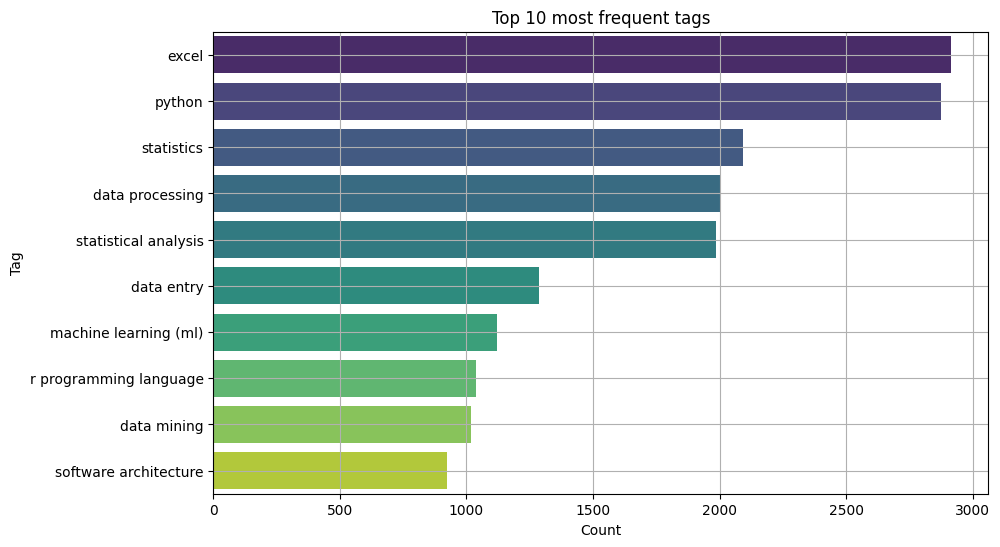

In [21]:
tag_counts = all_tags.value_counts()
# Visualización de las 10 habilidades más demandadas

plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.head(10), y=tag_counts.head(10).index, palette='viridis')
plt.title('Top 10 most frequent tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.grid(True)
plt.show()
